<a href="https://colab.research.google.com/github/BetikuOluwatobi/sentiment_analysis_with_transformers/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [2]:
import pandas as pd
data = pd.read_csv('/content/Mydrive/MyDrive/Transformers/case_study/train.csv',names=['Sentiment','Title','Text'])

In [3]:
data.head()

,Sentiment,Title,Text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


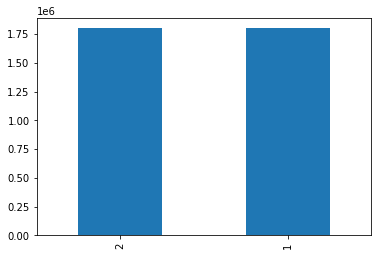

In [4]:
data.Sentiment.value_counts().plot(kind='bar')

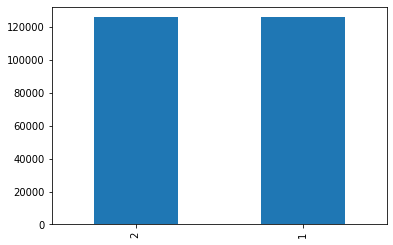

In [5]:
train = data.sample(frac=0.07, weights=None, random_state=100000)
train.Sentiment.value_counts().plot(kind='bar')

In [7]:
num_samples = len(train)
embed_dim = 256

num_samples,embed_dim

(252000, 256)

In [8]:
train.head()

,Sentiment,Title,Text
2865072,2,Funny,I think House Of Payne 4 was the best of all. ...
3097363,2,simple but effective,I'm using this as a silverware holder in my do...
436023,2,Been looking,Finally replaced my lost copy. Glad to have fo...
1799640,2,unforgettable story!,Even after having read this book several years...
2412331,1,Worst Laser Level Ever,This is awful. I can't believe I spent $5 on i...


In [9]:
positive_sentiment = train.Sentiment.max()
negative_sentiment = train.Sentiment.min()

In [10]:
num_samples

252000

In [11]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 52.4 MB/s 
     |████████████████████████████████| 163 kB 58.7 MB/s 


In [12]:
from transformers import BertTokenizer

In [13]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [14]:
train.Text.tolist()[0]

'I think House Of Payne 4 was the best of all. Great Stories and more humour and has not lost its message.Great ending to the series.'

In [ ]:
tokens = tokenizer(train.Text.tolist(),max_length=embed_dim,truncation=True,padding='max_length',add_special_tokens=True,return_tensors='np')

In [ ]:
tokens.keys()

In [ ]:
input_ids = tokens['input_ids']
attention_mask = tokens['attention_mask']

In [ ]:
size = input_ids.shape[0]

In [ ]:
import numpy as np

In [ ]:
arr = train.Sentiment.to_numpy()

In [ ]:
labels = np.zeros((size,positive_sentiment+1))
labels[np.arange(size),arr] = 1
labels = labels[:,1:]

In [ ]:
labels

In [ ]:
with open('/content/Mydrive/MyDrive/Transformers/case_study/amz-xids.npy','wb') as file:
  np.save(file,input_ids)

with open('/content/Mydrive/MyDrive/Transformers/case_study/amz-xmask.npy','wb') as file:
  np.save(file,attention_mask)

with open('/content/Mydrive/MyDrive/Transformers/case_study/amz-xlabels.npy','wb') as file:
  np.save(file,labels)

In [ ]:
# Load Input_ids
# mask = np.load('/content/Mydrive/MyDrive/Transformers/case_study/amz-xmask.npy',allow_pickle=True)